# Import Necessary libraries and Packages

In [12]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing as pp
from sklearn.cluster import KMeans
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = None
import pandas_profiling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

# Read Data and Data understanding

In [13]:
data=pd.read_excel('Rp-Ml.xlsx')
data.head()
data.tail()
data.info()
data.shape
data.describe()
data.isna().sum()

,date,price,Name
0,2013-02-08,68.4014,AAPL
1,2013-02-11,69.2771,AAPL
2,2013-02-12,68.9114,AAPL
3,2013-02-13,67.6628,AAPL
4,2013-02-14,67.3771,AAPL


,date,price,Name
1254,2018-02-01,168.62,AAPL
1255,2018-02-02,166.80,AAPL
1256,2018-02-05,163.88,AAPL
1257,2018-02-06,163.72,AAPL
1258,2018-02-07,163.40,AAPL


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 3 columns):
date     1259 non-null datetime64[ns]
price    1259 non-null float64
Name     1259 non-null object
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 29.6+ KB


(1259, 3)

,price
count,1259.000000
mean,109.951118
std,30.686186
min,57.085700
25%,85.334950
50%,110.030000
75%,128.100000
max,180.100000


date     0
price    0
Name     0
dtype: int64

# Split the data - train and test

In [5]:
train=data[0:1000] 
test=data[1000:]

# Exploratory data analysis

In [6]:
eda_report=pandas_profiling.ProfileReport(data)
eda_report.to_file("Timeseries.html")

In [16]:
train.shape, test.shape

((1000, 3), (259, 3))

# Understand the date - max, min values for train and test

In [18]:
train['date'].min(), train['date'].max(), test['date'].min(), test['date'].max()

(Timestamp('2013-02-08 00:00:00'),
 Timestamp('2017-01-27 00:00:00'),
 Timestamp('2017-01-30 00:00:00'),
 Timestamp('2018-02-07 00:00:00'))

# create prediction 

In [20]:
preds = []
for i in range(0,1000):
    a = train['price'][len(train)-1000+i:].sum() + sum(preds)
    b = a/1000
    preds.append(b)

# calculate RMSE

In [22]:
rms=np.sqrt(np.mean(np.power((np.array(train['price'])-preds),2)))
rms

21.085952424676734

# Plot price and predicted price

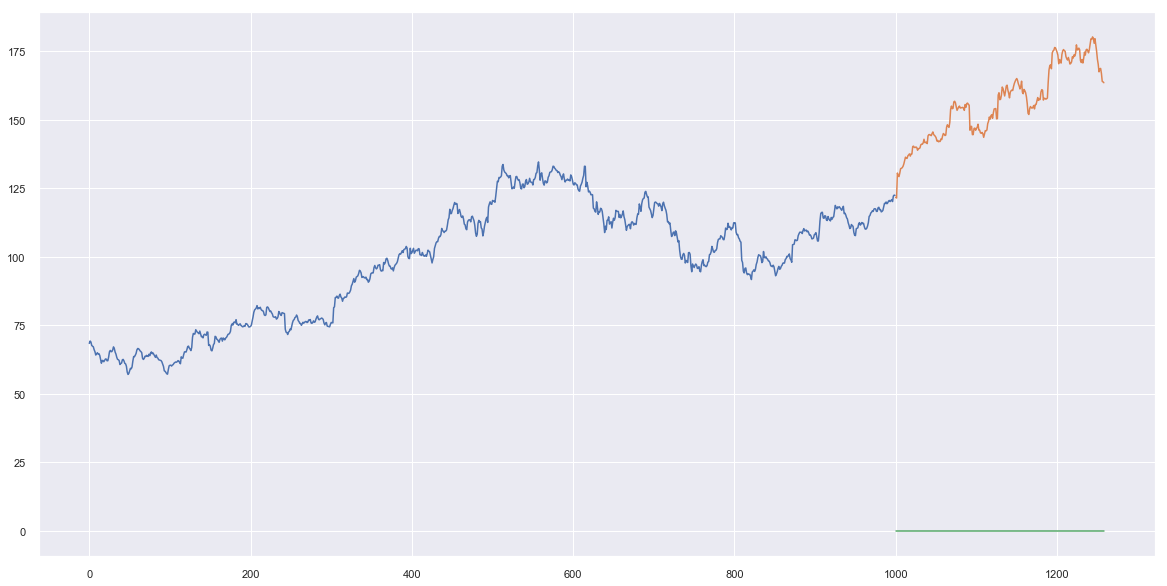

In [24]:
test['Predictions'] = 0
train['Predictions'] = preds
plt.plot(train['price'])
plt.plot(test[['price', 'Predictions']])